In [33]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from numpy import pi

simulator = Aer.get_backend('qasm_simulator')

def execute_and_plot(circuit, shots):
    result = execute(circuit, backend = simulator, shots = shots).result()
    counts = result.get_counts()
    return plot_histogram(counts)

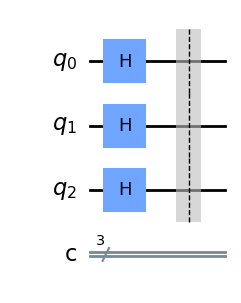

In [34]:
circuit = QuantumCircuit(3, 3)

# Initialize all qubits to state of superposition
circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.barrier()

circuit.draw(output='mpl')

In [35]:
# Grover's Algorithm (repeat O(sqrt(n)))
# Apply Oracle for state 110
circuit.x(0)
circuit.h(2)
circuit.ccx(0,1,2)
circuit.h(2)
circuit.x(0)

circuit.barrier()

# Perform the Grover's diffusion operator
circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.x(0)
circuit.x(1)
circuit.x(2)

circuit.h(2)
circuit.ccx(0,1,2)
circuit.h(2)

circuit.x(0)
circuit.x(1)
circuit.x(2)

circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.barrier()

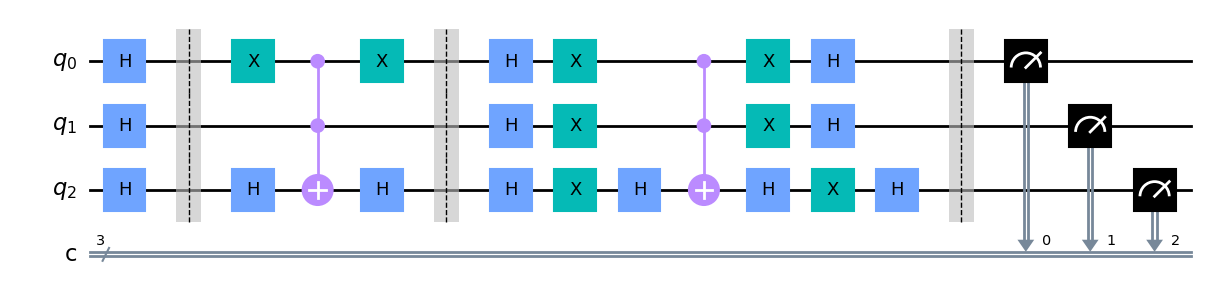

In [36]:
# Measure the output
circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)

circuit.draw(output='mpl')

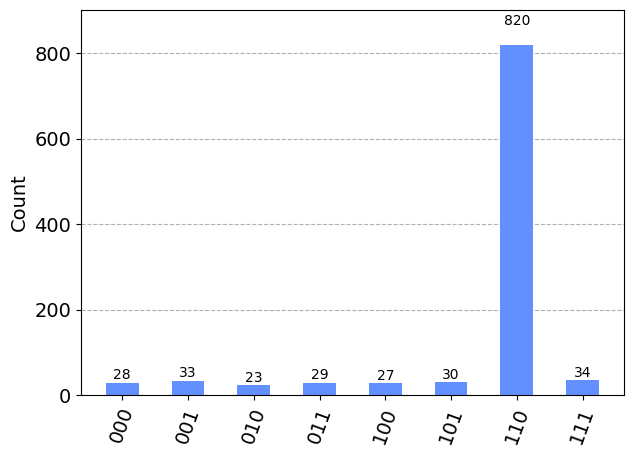

In [37]:
execute_and_plot(circuit, 1024)

In [ ]:
# Note that 110 is the highest probability measured state which gives us the answer